In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import numpy as np
import pandas as pd
import matplotlib

In [2]:
df = pd.read_csv("data/contamination_fracking.csv")
df.dropna(inplace=True)

In [3]:
df.head()

,Unnamed: 0,geometry,distance_nearest,LatitudeFracking,LongitudeFracking,JobEndDate,PercentHighAdditive,PercentHFJob,IngredientName,Purpose,...,CollectionDate,FacilityID,State,ContaminantCount,index,FacilityWaterType,Zip,LatitudePWS,LongitudePWS,SizeBool
2,2,POINT (33.786594 -118.298662),11.066041,36.20023,-107.49905,2014-02-02 00:00:00,30.000000,1.729810,"('Potassium Hydroxide', 'Amino Alkyl Phosphoni...","('Other Chemicals', 'Surfactant', 'Nitrogen', ...",...,2014-02-06,1,CA,28,67540,SW,91802,33.786594,-118.298662,0
9,9,POINT (30.549676 -84.606864),4.053320,33.40651,-87.48226,2014-01-05 00:00:00,36.573585,1.897712,"('Potassium Hydroxide', 'Iron Oxide', 'Isoprop...","('Bulk Acid', 'Cross-linkers', 'Acid Corrosion...",...,2014-02-06,1,FL,28,89596,GW,32353,30.549676,-84.606864,0
10,10,POINT (30.549676 -84.606864),4.053320,33.40651,-87.48226,2014-01-05 00:00:00,36.573585,1.897712,"('Potassium Hydroxide', 'Iron Oxide', 'Isoprop...","('Bulk Acid', 'Cross-linkers', 'Acid Corrosion...",...,2014-02-06,2,FL,28,89788,GW,32353,30.549676,-84.606864,0
11,11,POINT (30.549676 -84.606864),4.053320,33.40651,-87.48226,2014-01-05 00:00:00,36.573585,1.897712,"('Potassium Hydroxide', 'Iron Oxide', 'Isoprop...","('Bulk Acid', 'Cross-linkers', 'Acid Corrosion...",...,2014-02-06,5,FL,28,89635,GW,32353,30.549676,-84.606864,0
12,12,POINT (30.549676 -84.606864),4.053320,33.40651,-87.48226,2014-01-05 00:00:00,36.573585,1.897712,"('Potassium Hydroxide', 'Iron Oxide', 'Isoprop...","('Bulk Acid', 'Cross-linkers', 'Acid Corrosion...",...,2014-02-06,6,FL,28,89615,GW,32353,30.549676,-84.606864,0


In [4]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(df,df.ContaminantCount,test_size=0.3)

In [6]:
from sklearn.metrics import mean_squared_error

In [85]:
f = ['JobDuration','PercentHFJob','PercentHighAdditive','TotalBaseWaterVolume','distance_nearest','TotalBaseNonWaterVolume','SizeBool']

for x in f:
    reg = LinearRegression()
    reg.fit(np.array(X_train[x]).reshape(-1,1),Y_train)
    pred = reg.predict(np.array(X_test[x]).reshape(-1,1))
    print(x)
    print("MSE : ",mean_squared_error(pred,Y_test))
    print("R Score", reg.score(np.array(X_test[x]).reshape(-1,1),Y_test))
    print("Coeff:", reg.coef_)

reg = LinearRegression()
reg.fit(np.array(X_train[f]),Y_train)
pred = reg.predict(np.array(X_test[f]))
print("Combined")
print("MSE : ",mean_squared_error(pred,Y_test))
print("R Score", reg.score(np.array(X_test[f]),Y_test))
print("Coeff:", reg.coef_)

JobDuration
MSE :  71.65587514672686
R Score 0.0015308056759043565
Coeff: [-0.02116566]
PercentHFJob
MSE :  71.36796048357945
R Score 0.005542673804766585
Coeff: [-0.281845]
PercentHighAdditive
MSE :  70.72703035233367
R Score 0.014473539423986437
Coeff: [-0.12946591]
TotalBaseWaterVolume
MSE :  69.3949490887294
R Score 0.033035061466968996
Coeff: [-2.28678264e-07]
distance_nearest
MSE :  69.98628180481366
R Score 0.02479529746440634
Coeff: [0.12244982]
TotalBaseNonWaterVolume
MSE :  71.74639063107993
R Score 0.0002695424152044934
Coeff: [-9.54356804e-08]
SizeBool
MSE :  71.75262704145406
R Score 0.00018264286050673206
Coeff: [-0.61365344]
Combined
MSE :  67.17862256459685
R Score 0.063917857251382
Coeff: [ 1.02611853e-02  1.09146765e-01 -1.60990733e-01 -2.42556915e-07
  6.81144433e-02 -3.28045990e-08 -8.59305555e-01]


In [34]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

for x in ['FacilityWaterType','Zip']:
    enc.fit(np.array(df[x]).reshape(-1,1))
    reg.fit(enc.transform(np.array(X_train[x]).reshape(-1,1)).toarray(), Y_train)
    en = enc.transform(np.array(X_test[x]).reshape(-1,1)).toarray()
    pred = reg.predict(en)
    print(x)
    print("MSE : ",mean_squared_error(pred,Y_test))
    print("R Score", reg.score(en,Y_test))
    print("Coeff:", reg.coef_)
    print("Max Coeff:",max(reg.coef_))

FacilityWaterType
MSE :  69.17250963683848
R Score 0.036134583172071855
Coeff: [-1.50279857e+12 -1.50279857e+12 -1.50279857e+12 -1.50279857e+12]
Max Coeff: -1502798571898.8494
Zip
MSE :  4.254660504879906e+23
R Score -5.928540315405023e+21
Coeff: [1.20707764e+11 1.20707764e+11 1.20707764e+11 ... 1.20707764e+11
 1.20707764e+11 1.20707764e+11]
Max Coeff: 52518635652975.195


## SAWYER WORK

This is a plot modeling the variables from Yash's quantitative data against contamination count.

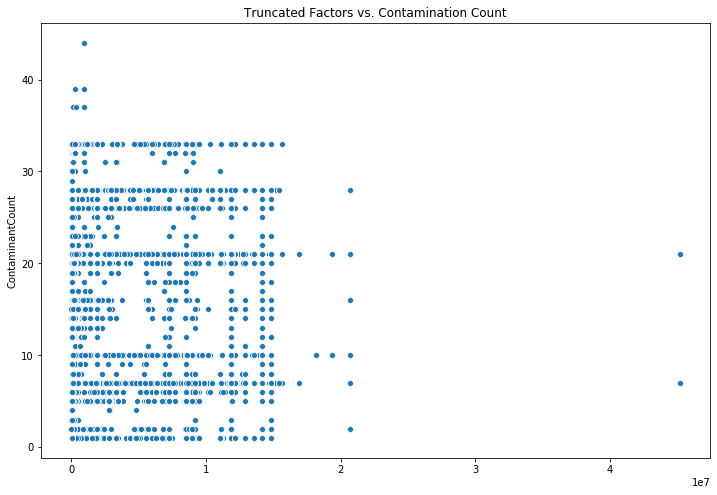

In [101]:
from sklearn.decomposition import TruncatedSVD
import seaborn as sns

x=pd.DataFrame([X_train['JobDuration'] ,X_train['PercentHFJob'], X_train['PercentHighAdditive'], X_train['TotalBaseWaterVolume'], X_train['distance_nearest'], X_train['TotalBaseNonWaterVolume'], X_train['SizeBool']])

coords_X_train = TruncatedSVD(n_components=2).fit_transform(x.transpose())

plt.subplots(figsize=(12,8))
sns.scatterplot(
    x=coords_X_train[:, 0], 
    y=Y_train
)
plt.title('Truncated Factors vs. Contamination Count')

plt.show()



In [48]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Classifers to test
classifiers = {
    'Logit':LogisticRegression(),
    #'Linear':LinearRegression(),
    #'Lasso':Lasso(),
    #'Ridge':Ridge()
}

scores = {} # Store cross-validation results in a dictionary
for classifier in classifiers: 
    scores[classifier] = cross_validate( # perform cross-validation
        classifiers[classifier], # classifier object
        x.transpose(), # feature matrix
        Y_train, # gold labels
        cv=5, #number of folds
        scoring=['accuracy'] # scoring methods
    )

/Users/sawyer/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/sawyer/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sawyer/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/sawyer/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sawyer/opt

In [49]:
# Examine the performance of our simple classifiers
# Freebie function to summarize and display classifier scores
def compare_scores(scores_dict):
    '''
    Takes a dictionary of cross_validate scores.
    Returns a color-coded Pandas dataframe that summarizes those scores.
    '''
    import pandas as pd
    df = pd.DataFrame(scores_dict).T.applymap(np.mean).style.background_gradient(cmap='RdYlGn')
    return df

# Compare cross-validation scores
# Note that colorization of the `time` columns is counterintuitive
compare_scores(scores)

,fit_time,score_time,test_accuracy
Logit,50.8597,0.0184406,0.351408
